In [18]:
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [19]:
N = 100
num_rows = 5
num_cols = 5
grid = np.zeros((num_rows,num_cols))

In [20]:
gamma = 0.9  
for num in range(N): #number of times we will go through the whole grid
    for i in range(num_rows):      #all the rows
        for j in range(num_cols):    #all the columns
            
            north = grid[i-1][j] if i > 0 else 0   #if going up takes us out of the grid then its value be 0
            south = grid[i+1][j] if i < 4 else 0   #if going down takes us out of the grid then its value be 0
            east = grid[i][j+1] if j < 4 else 0    #if going right takes us out of the grid then its value be 0
            west = grid[i][j-1] if j > 0 else 0    #if going left takes us out of the grid then its value be 0
            
            actions = [north, south, east, west]      

            value=0  
            if i==0 and j==1: # the position of A
                value = 10 + gamma*grid[4][1]
            elif i==0 and j==3: # the position of B
                value = 5 + gamma*grid[2][3]
            else:
                for a in actions:
                    if a != 0: 
                        value += .25 * (0 + gamma*a)  #if we don't go out of the grid
                    else:
                        value += .25 * (-1 + gamma*grid[i][j]) #if we go out of the grid
            grid[i][j] = value

In [21]:
np.round(grid, 1)

array([[ 3.3,  8.8,  4.4,  5.3,  1.5],
       [ 1.5,  3. ,  2.3,  1.9,  0.5],
       [ 0.1,  0.7,  0.7,  0.4, -0.4],
       [-1. , -0.4, -0.4, -0.6, -1.2],
       [-1.9, -1.3, -1.2, -1.4, -2. ]])

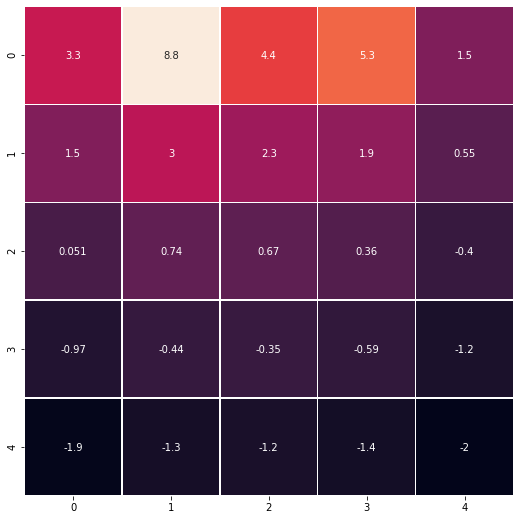

In [13]:
fig, ax = plt.subplots(figsize=(13, 9))
ax = sns.heatmap(grid, annot=True, square=True, linewidths=0.5, cbar=False)
ax.set_ylim([5,0])
fig.savefig('./figures/p3_uniform_grid_gamma09.png')

array([[-0.2,  9.6, -0.4,  4.4, -0.2],
       [-0.4, -0.6, -0.6, -0.6, -0.4],
       [-0.4, -0.6, -0.6, -0.6, -0.4],
       [-0.4, -0.6, -0.6, -0.6, -0.4],
       [-0.2, -0.4, -0.4, -0.4, -0.2]])